In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

In [2]:
train =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
hist_trans = pd.read_csv('historical_transactions.csv')

In [4]:
new_merchants = pd.read_csv('new_merchant_transactions.csv')

In [5]:
from featexp import get_univariate_plots
import chartify

Loading BokehJS ...

In [18]:
train.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

In [20]:
train.isnull().values.any() # Dataframe contains no null values, neat! 

False

In [105]:
train.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-01-01  C_ID_3d0044924f          4          1          0   
2         2016-08-01  C_ID_d639edf6cd          2          2          0   
3         2017-09-01  C_ID_186d6a6901          4          3          0   
4         2017-11-01  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

In [22]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB


In [6]:
for df in [train, test]:
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])
    df['year'] = df['first_active_month'].dt.year
    df['month'] = df['first_active_month'].dt.month
    df['elapsed_time'] = (datetime.date(2018, 2, 1) - df['first_active_month'].dt.date).dt.days

**Converting the first active month column into datetime format, and seperating the year and month into seperate columns so that we can inspect if theres any significance to month a user began**

In [109]:
train.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-01-01  C_ID_3d0044924f          4          1          0   
2         2016-08-01  C_ID_d639edf6cd          2          2          0   
3         2017-09-01  C_ID_186d6a6901          4          3          0   
4         2017-11-01  C_ID_cdbd2c0db2          1          3          0   

     target  year  month  elapsed_time  
0 -0.820283  2017      6           245  
1  0.392913  2017      1           396  
2  0.688056  2016      8           549  
3  0.142495  2017      9           153  
4 -0.159749  2017     11            92

C:\Users\Ameen\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Distrubution')

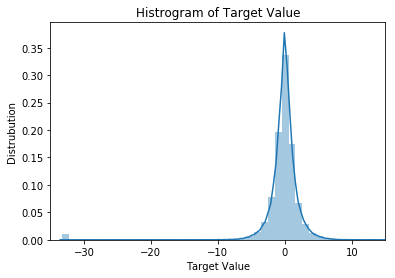

In [24]:
_ = sns.distplot(train.target)
plt.title('Histrogram of Target Value')
plt.xlim(-35, 15)
plt.xlabel('Target Value')
plt.ylabel('Distrubution')

Why is there a spike in target values at -33 and no where else. Perhaps there is a reason for this. But for model prediction these values maybe should be excluded

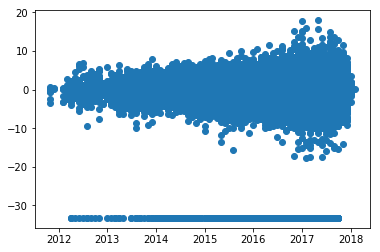

In [25]:
_ = plt.plot_date(data=train, x='first_active_month', y='target')

In [46]:
hist_trans.head() #Contains information about the cusotmer transaction

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_4e6213e9bc       88          N             0   
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                    80  M_ID_e020e9b302         -8   
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.703331  2017-06-25 15:33:07         1.0        16            37  
1        -0.733128  2017-07-15 12:10:45         1.0        16            16  
2        -0.720386  2017-08-09 22:04:29         1.0        16            37  
3        -0.735352  2017-09-02 10:06:26         1.0        16            34  
4        -0.722865  2017-03-10 01:14:19         1.0        16            37

In [52]:
new_merchants.head() 
# contains the transactions at new merchants (merchant_ids that this particular card_id has not yet visited) 
# over a period of two months.

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_415bb3a509      107          N             1   
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          B                   307  M_ID_b0c793002c          1   
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.557574  2018-03-11 14:57:36         1.0         9            19  
1        -0.569580  2018-03-19 18:53:37         1.0         9            19  
2        -0.551037  2018-04-26 14:08:44         1.0         9            14  
3        -0.671925  2018-03-07 09:43:21         NaN        -1             8  
4        -0.659904  2018-03-22 21:07:53         NaN        -1            29

In [7]:
hist_and_new = [hist_trans, new_merchants] 
Transactions = pd.concat(hist_and_new, keys=['Not_new', 'New_Merchant'])

#Concat this information, creating a multi-index seperating the new and old merchant visits  

In [69]:
Transactions.isnull().values.any() #Contains null values

Transactions.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 31075392 entries, (Not_new, 0) to (New_Merchant, 1963030)
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 3.6+ GB


In [8]:
Transactions = Transactions.dropna()

In [9]:
Transactions = Transactions.drop('category_1', axis=1) #Examining the value counts showed all the values were N

In [25]:
def make_dummies(x):
    if x == 'A':
        return 1
    elif x == 'B':
        return 2
    elif x == 'C':
        return 3

In [28]:
Transactions['category_3'] = Transactions.category_3.apply(f) #Convert the category 3 values into integers

In [32]:
Transactions['authorized_flag'] = Transactions['authorized_flag'].map({'Y':1, 'N':0})

In [35]:
Transactions.head()

authorized_flag          card_id  city_id  installments category_3  \
Not_new 0                1  C_ID_4e6213e9bc       88             0       None   
        1                1  C_ID_4e6213e9bc       88             0       None   
        2                1  C_ID_4e6213e9bc       88             0       None   
        3                1  C_ID_4e6213e9bc       88             0       None   
        4                1  C_ID_4e6213e9bc       88             0       None   

           merchant_category_id      merchant_id  month_lag  purchase_amount  \
Not_new 0                    80  M_ID_e020e9b302         -8        -0.703331   
        1                   367  M_ID_86ec983688         -7        -0.733128   
        2                    80  M_ID_979ed661fc         -6        -0.720386   
        3                   560  M_ID_e6d5ae8ea6         -5        -0.735352   
        4                    80  M_ID_e020e9b302        -11        -0.722865   

           purchase_date  category_2  state_id  subsector_id  
Not_new 0       1.498405         1.0        16            37  
        1       1.500121         1.0        16            16  
        2       1.502316         1.0        16            37  
        3       1.504347         1.0        16            34  
        4       1.489108         1.0        16            37

In [34]:
history = aggregate_historical_transactions(Transactions)

DataError: No numeric types to aggregate

In [7]:
hist_trans['authorized_flag'] = hist_trans['authorized_flag'].map({'Y':1, 'N':0})
hist_trans['category_1'] = hist_trans['category_1'].map({'Y':1, 'N':0})
hist_trans['category_3'] = hist_trans['category_3'].map({'A':1, 'B':2, 'C':3})
hist_trans = hist_trans.dropna()

In [22]:
new_merchants['authorized_flag'] = new_merchants['authorized_flag'].map({'Y':1, 'N':0})
new_merchants['category_1'] = new_merchants['category_1'].map({'Y':1, 'N':0})
new_merchants['category_3'] = new_merchants['category_3'].map({'A':1, 'B':2, 'C':3})
new_merchants = new_merchants.dropna()

In [23]:
hist_and_new = [hist_trans, new_merchants] 
Transactions = pd.concat(hist_and_new, keys=['Not_new', 'New_Merchant'])

In [10]:
def aggregate_historical_transactions(history):
    
    history.loc[:, 'purchase_date'] = pd.DatetimeIndex(history['purchase_date']).\
                                      astype(np.int64) * 1e-9
    
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'city_id': ['nunique'],
        'purchase_amount': ['sum', 'median', 'max', 'min', 'std'],
        'installments': ['sum', 'median', 'max', 'min', 'std'],
        'purchase_date': [np.ptp],
        'month_lag': ['min', 'max'],
        'category_1': ['sum', 'mean'],
        'category_2': ['sum', 'mean'],
        'category_3': ['sum', 'mean']

        }
    
    agg_history = history.groupby(['card_id']).agg(agg_func)
    agg_history.columns = ['hist_' + '_'.join(col).strip() 
                           for col in agg_history.columns.values]
    agg_history.reset_index(inplace=True)
    
    df = (history.groupby('card_id')
          .size()
          .reset_index(name='hist_transactions_count'))
    
    agg_history = pd.merge(df, agg_history, on='card_id', how='left')
    
    return agg_history

In [24]:
grouped_trans = aggregate_historical_transactions(Transactions)

In [25]:
new_train = pd.merge(train, grouped_trans, on='card_id', how='left')

In [26]:
new_train = new_train.dropna()

In [11]:
grouped_hist = aggregate_historical_transactions(hist_trans)

In [13]:
train = pd.merge(train, grouped_hist, on='card_id', how='left')

In [14]:
train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target', 'year', 'month', 'elapsed_time', 'hist_transactions_count',
       'hist_authorized_flag_sum', 'hist_authorized_flag_mean',
       'hist_merchant_id_nunique', 'hist_city_id_nunique',
       'hist_purchase_amount_sum', 'hist_purchase_amount_median',
       'hist_purchase_amount_max', 'hist_purchase_amount_min',
       'hist_purchase_amount_std', 'hist_installments_sum',
       'hist_installments_median', 'hist_installments_max',
       'hist_installments_min', 'hist_installments_std',
       'hist_purchase_date_ptp', 'hist_month_lag_min', 'hist_month_lag_max',
       'hist_category_1_sum', 'hist_category_1_mean', 'hist_category_2_sum',
       'hist_category_2_mean', 'hist_category_3_sum', 'hist_category_3_mean'],
      dtype='object')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201917 entries, 0 to 201916
Data columns (total 33 columns):
first_active_month             201917 non-null datetime64[ns]
card_id                        201917 non-null object
feature_1                      201917 non-null int64
feature_2                      201917 non-null int64
feature_3                      201917 non-null int64
target                         201917 non-null float64
year                           201917 non-null int64
month                          201917 non-null int64
elapsed_time                   201917 non-null int64
hist_transactions_count        198253 non-null float64
hist_authorized_flag_sum       198253 non-null float64
hist_authorized_flag_mean      198253 non-null float64
hist_merchant_id_nunique       198253 non-null float64
hist_city_id_nunique           198253 non-null float64
hist_purchase_amount_sum       198253 non-null float64
hist_purchase_amount_median    198253 non-null float64
hist_purchase_a

In [19]:
train = train.dropna()

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196825 entries, 0 to 201916
Data columns (total 33 columns):
first_active_month             196825 non-null datetime64[ns]
card_id                        196825 non-null object
feature_1                      196825 non-null int64
feature_2                      196825 non-null int64
feature_3                      196825 non-null int64
target                         196825 non-null float64
year                           196825 non-null int64
month                          196825 non-null int64
elapsed_time                   196825 non-null int64
hist_transactions_count        196825 non-null float64
hist_authorized_flag_sum       196825 non-null float64
hist_authorized_flag_mean      196825 non-null float64
hist_merchant_id_nunique       196825 non-null float64
hist_city_id_nunique           196825 non-null float64
hist_purchase_amount_sum       196825 non-null float64
hist_purchase_amount_median    196825 non-null float64
hist_purchase_a

card_id is categorical. Categorical features not supported yet.
                                         Plots for feature_1                                          


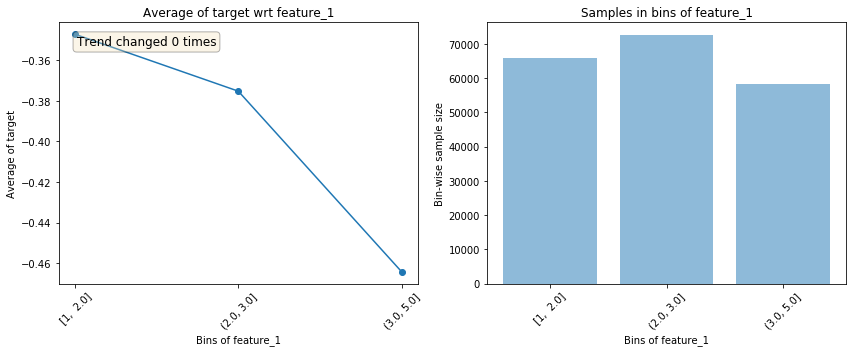

--------------------------------------------------------------------------------------------------------------


                                         Plots for feature_2                                          


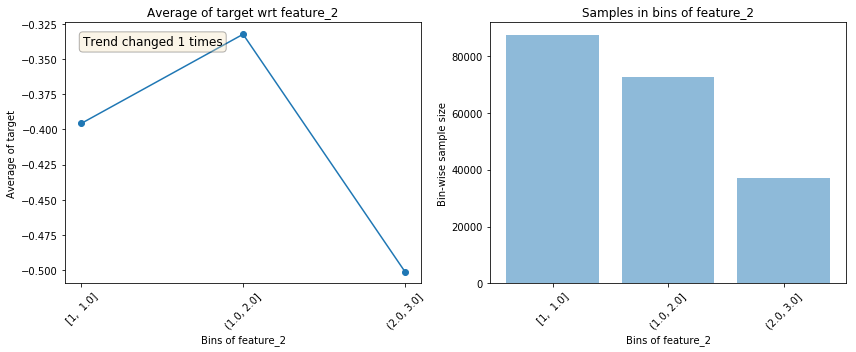

--------------------------------------------------------------------------------------------------------------


                                         Plots for feature_3                                          


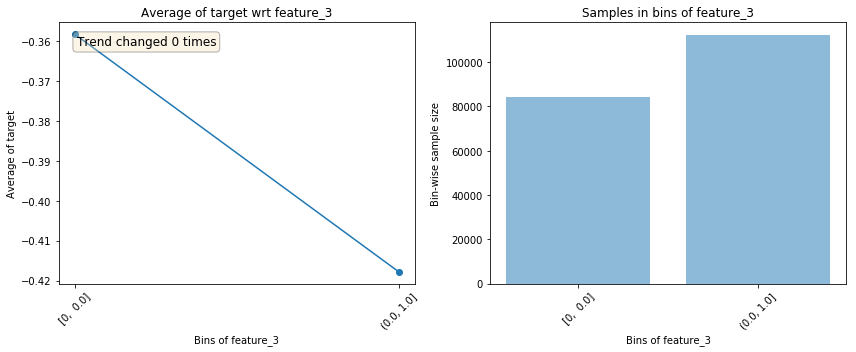

--------------------------------------------------------------------------------------------------------------


                                            Plots for year                                            


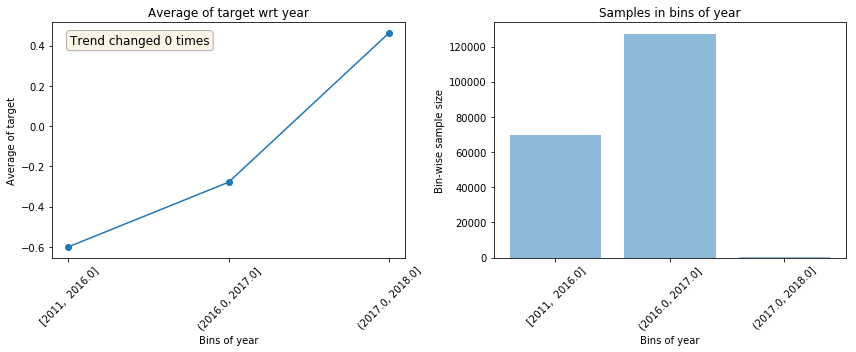

--------------------------------------------------------------------------------------------------------------


                                           Plots for month                                            


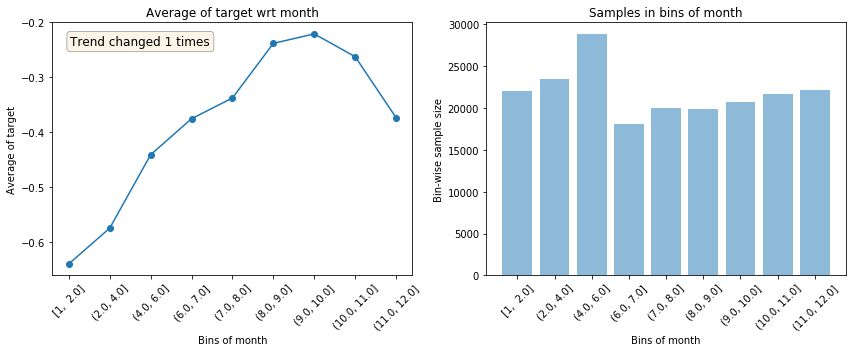

--------------------------------------------------------------------------------------------------------------


                                        Plots for elapsed_time                                        


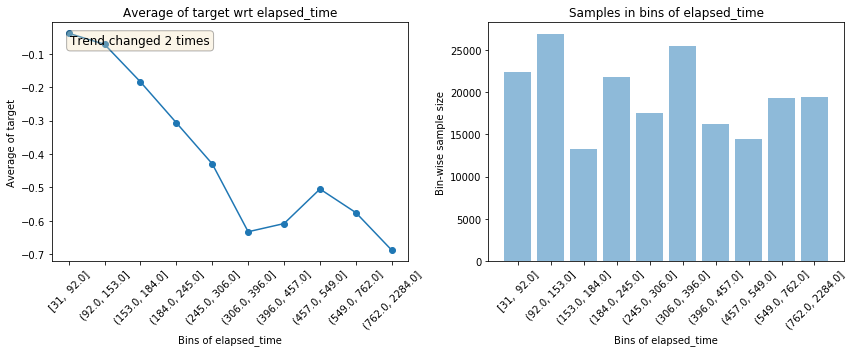

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_transactions_count                                   


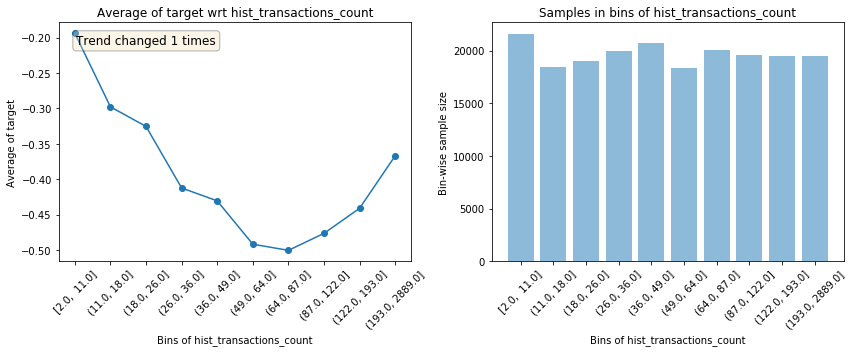

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_authorized_flag_sum                                  


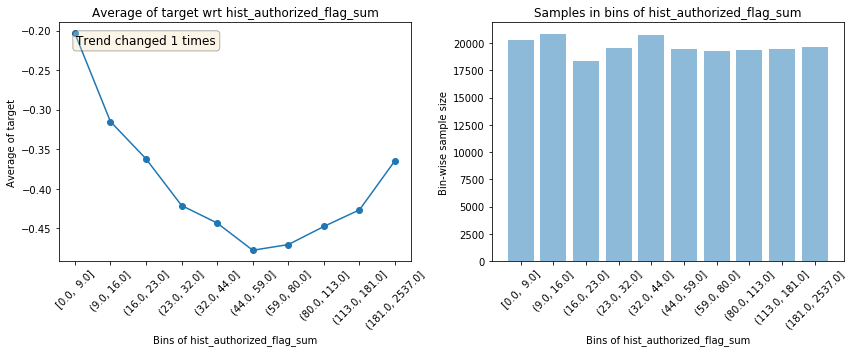

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_authorized_flag_mean                                  


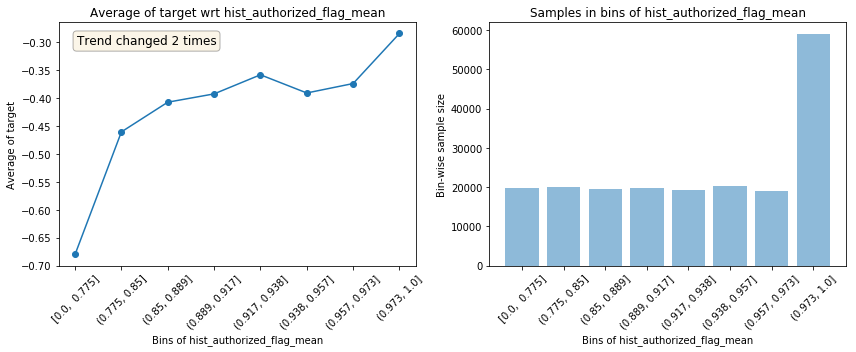

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_merchant_id_nunique                                  


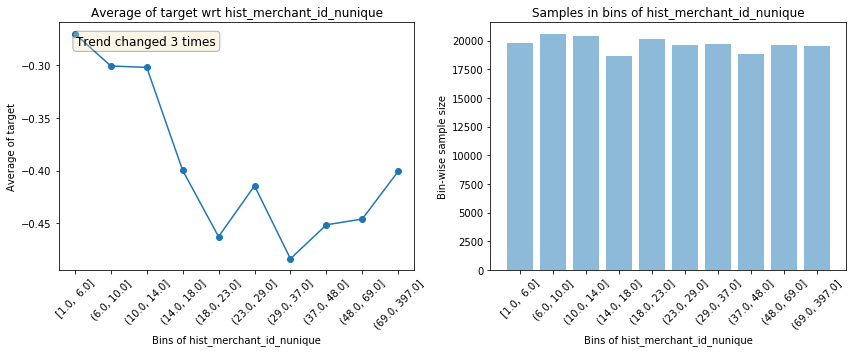

--------------------------------------------------------------------------------------------------------------


                                    Plots for hist_city_id_nunique                                    


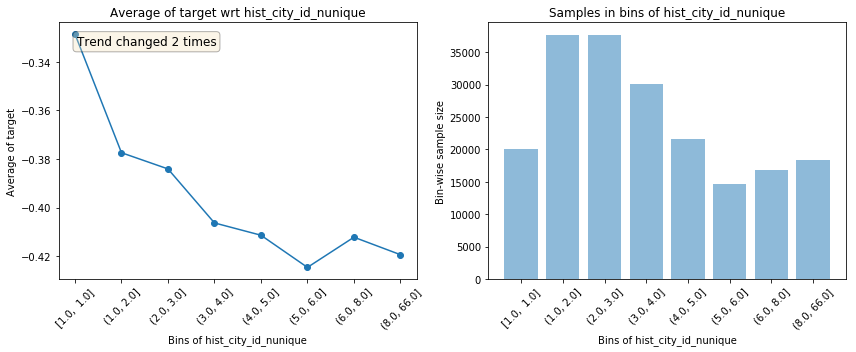

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_purchase_amount_sum                                  


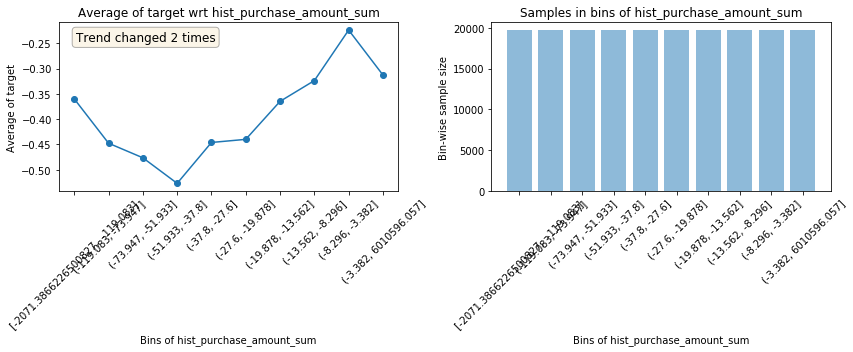

--------------------------------------------------------------------------------------------------------------


                                Plots for hist_purchase_amount_median                                 


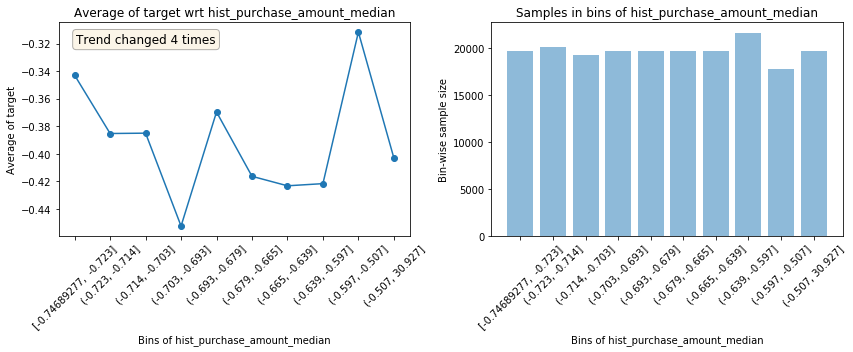

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_purchase_amount_max                                  


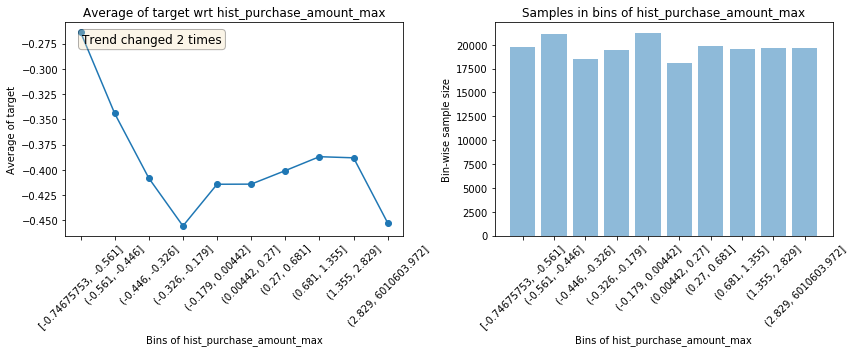

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_purchase_amount_min                                  


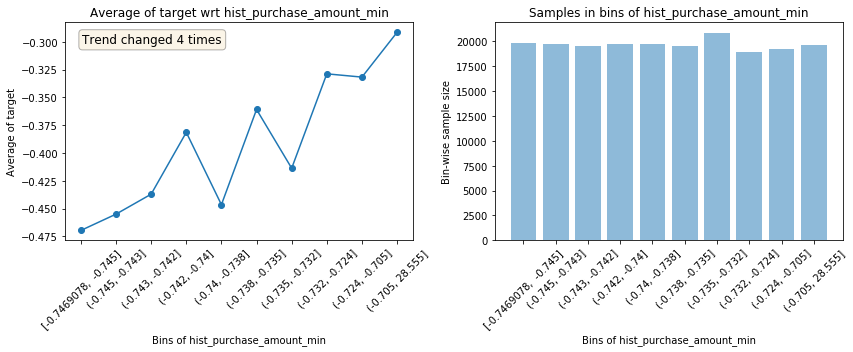

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_purchase_amount_std                                  


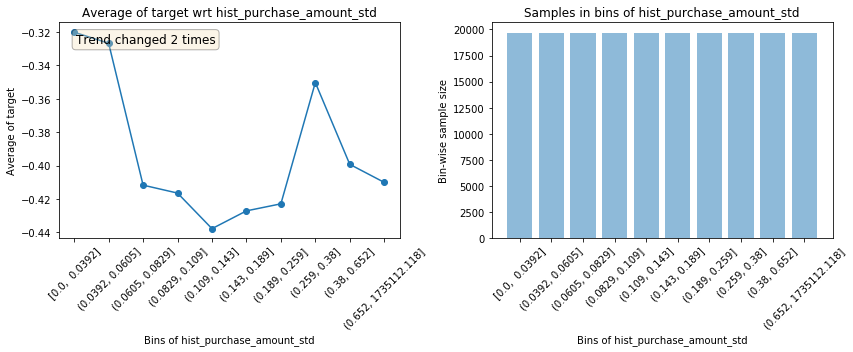

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_installments_sum                                    


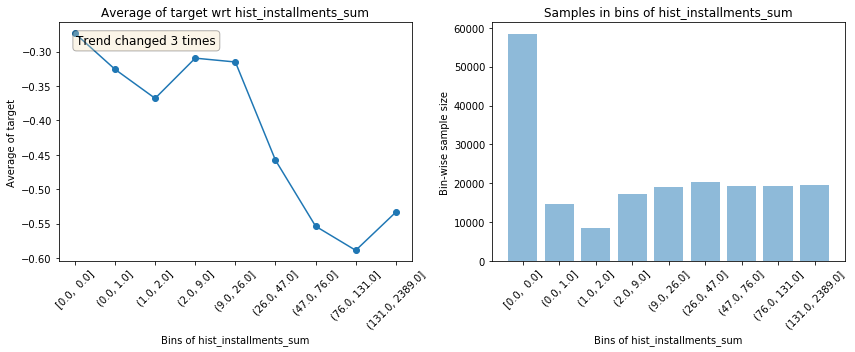

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_installments_median                                  


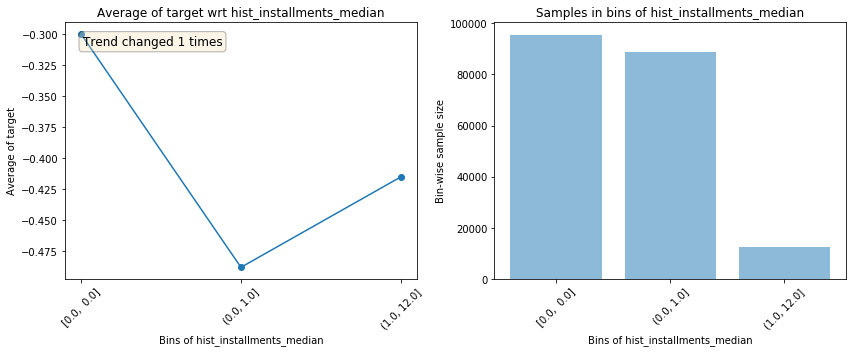

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_installments_max                                    


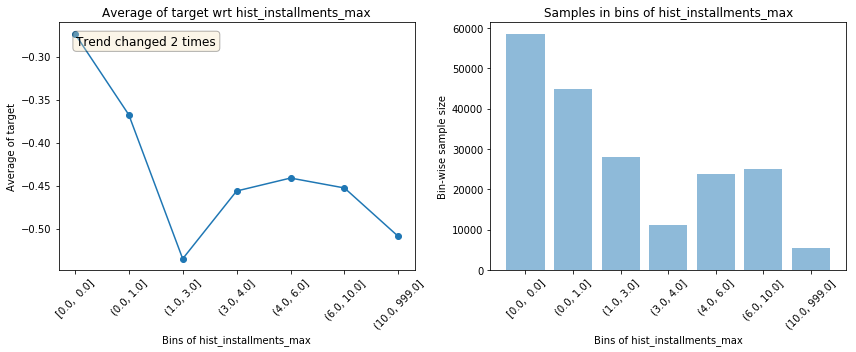

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_installments_min                                    


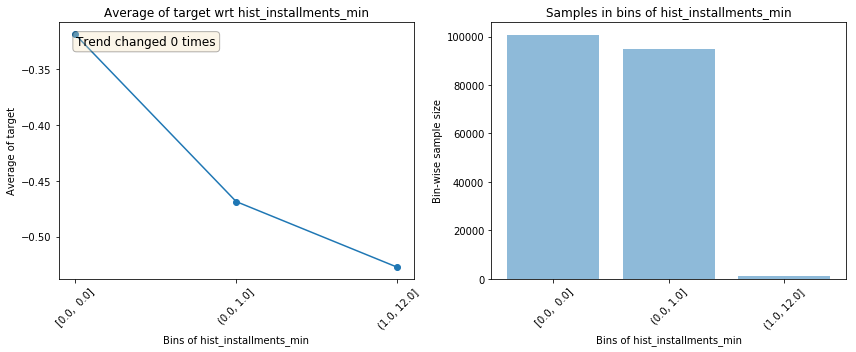

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_installments_std                                    


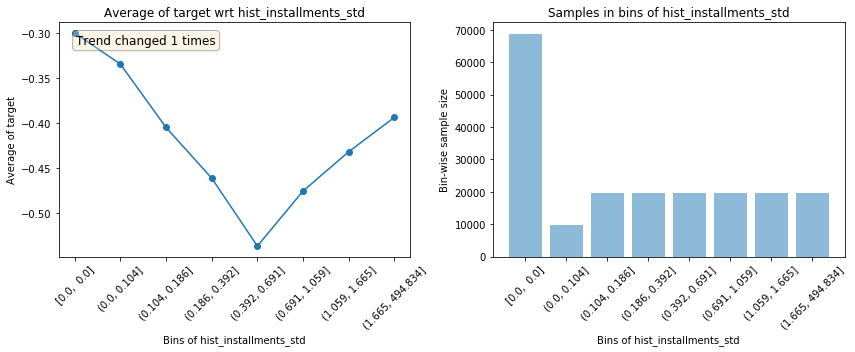

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_purchase_date_ptp                                   


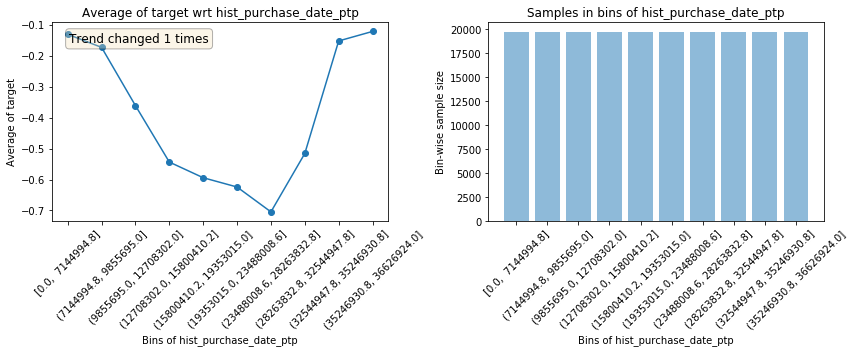

--------------------------------------------------------------------------------------------------------------


                                     Plots for hist_month_lag_min                                     


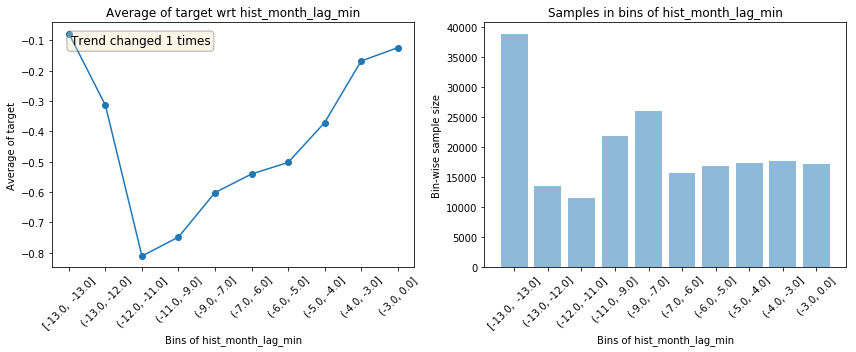

--------------------------------------------------------------------------------------------------------------


                                     Plots for hist_month_lag_max                                     


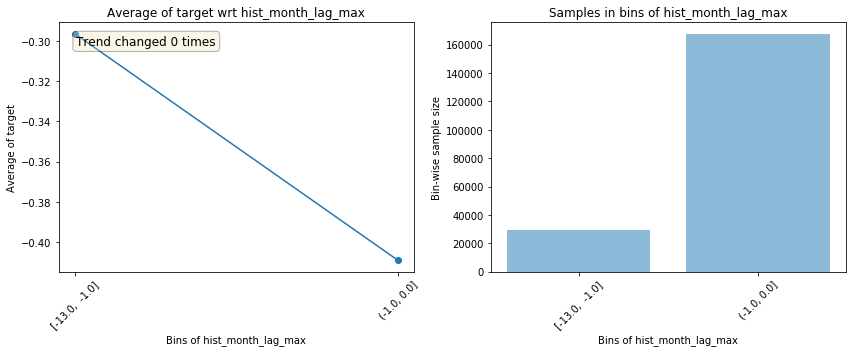

--------------------------------------------------------------------------------------------------------------


                                    Plots for hist_category_1_sum                                     


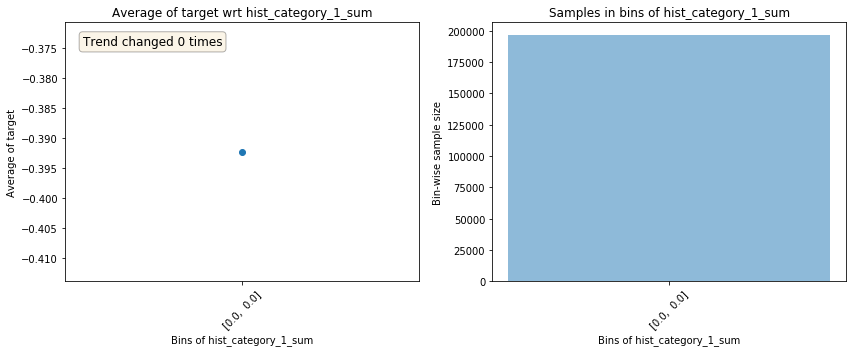

--------------------------------------------------------------------------------------------------------------


                                    Plots for hist_category_1_mean                                    


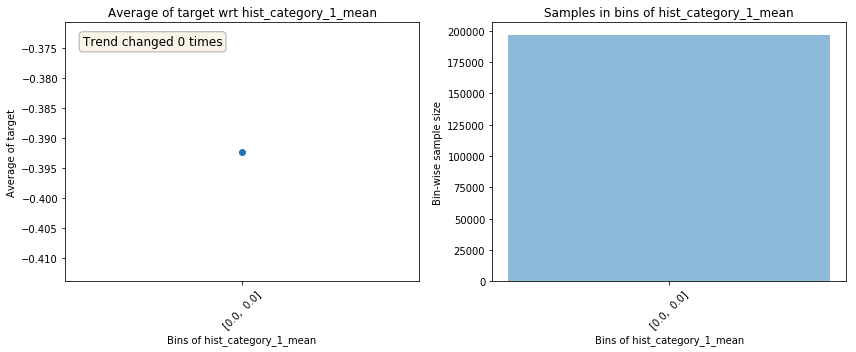

--------------------------------------------------------------------------------------------------------------


                                    Plots for hist_category_2_sum                                     


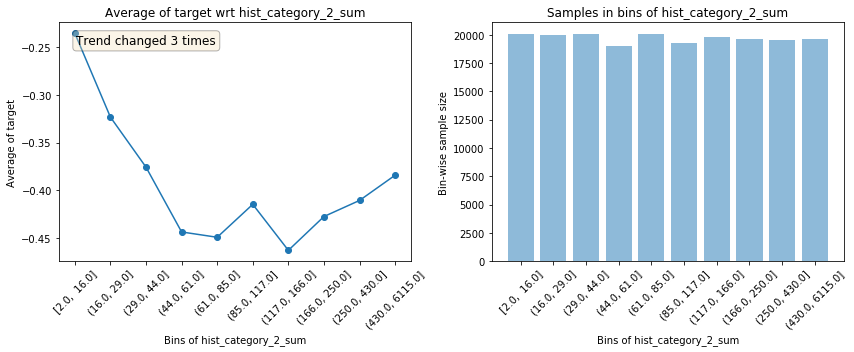

--------------------------------------------------------------------------------------------------------------


                                    Plots for hist_category_2_mean                                    


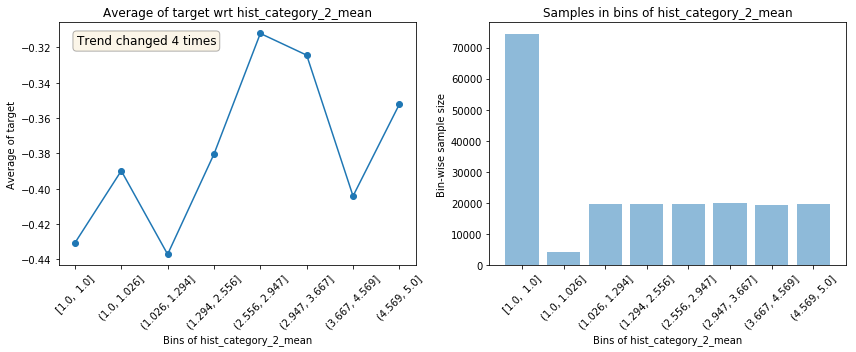

--------------------------------------------------------------------------------------------------------------


                                    Plots for hist_category_3_sum                                     


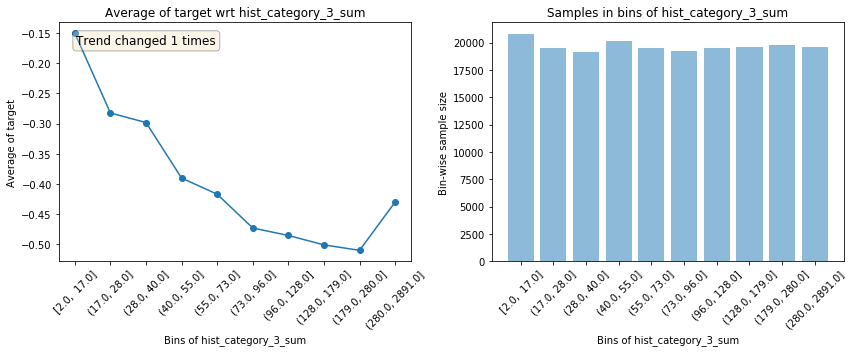

--------------------------------------------------------------------------------------------------------------


                                    Plots for hist_category_3_mean                                    


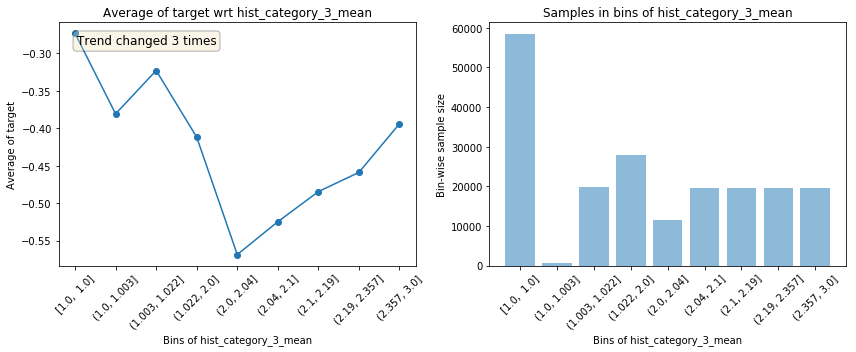

--------------------------------------------------------------------------------------------------------------




In [21]:
get_univariate_plots(data=train, target_col='target', features_list=[
                         
       'card_id', 'feature_1', 'feature_2', 'feature_3', 'year', 'month', 'elapsed_time', 'hist_transactions_count',
       'hist_authorized_flag_sum', 'hist_authorized_flag_mean',
       'hist_merchant_id_nunique', 'hist_city_id_nunique',
       'hist_purchase_amount_sum', 'hist_purchase_amount_median',
       'hist_purchase_amount_max', 'hist_purchase_amount_min',
       'hist_purchase_amount_std', 'hist_installments_sum',
       'hist_installments_median', 'hist_installments_max',
       'hist_installments_min', 'hist_installments_std',
       'hist_purchase_date_ptp', 'hist_month_lag_min', 'hist_month_lag_max',
       'hist_category_1_sum', 'hist_category_1_mean', 'hist_category_2_sum',
       'hist_category_2_mean', 'hist_category_3_sum', 'hist_category_3_mean'
                         
                     ], bins=10)

In [28]:
new_train.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-01-01  C_ID_3d0044924f          4          1          0   
2         2016-08-01  C_ID_d639edf6cd          2          2          0   
3         2017-09-01  C_ID_186d6a6901          4          3          0   
4         2017-11-01  C_ID_cdbd2c0db2          1          3          0   

     target  year  month  elapsed_time  hist_transactions_count_x  \
0 -0.820283  2017      6           245                      254.0   
1  0.392913  2017      1           396                      317.0   
2  0.688056  2016      8           549                       43.0   
3  0.142495  2017      9           153                       63.0   
4 -0.159749  2017     11            92                      117.0   

            ...            hist_installments_std_y  hist_purchase_date_ptp_y  \
0           ...                           0.119513              1.525001e+09   
1           ...                           1.377200              1.522393e+09   
2           ...                           0.000000              1.524937e+09   
3           ...                           0.121268              1.523949e+09   
4           ...                           0.000000              1.524941e+09   

   hist_month_lag_min_y  hist_month_lag_max_y  hist_category_1_sum_y  \
0                    -8                     2                      0   
1                   -12                     2                      0   
2                   -13                     2                      0   
3                    -5                     2                      0   
4                    -3                     2                      0   

   hist_category_1_mean_y  hist_category_2_sum_y  hist_category_2_mean_y  \
0                       0                  289.0                1.043321   
1                       0                  323.0                1.000000   
2                       0                  204.0                4.636364   
3                       0                  236.0                3.470588   
4                       0                  558.0                3.720000   

   hist_category_3_sum_y  hist_category_3_mean_y  
0                  281.0                1.014440  
1                  705.0                2.182663  
2                   44.0                1.000000  
3                  137.0                2.014706  
4                  300.0                2.000000  

[5 rows x 57 columns]

In [29]:
new_train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target', 'year', 'month', 'elapsed_time', 'hist_transactions_count_x',
       'hist_authorized_flag_sum_x', 'hist_authorized_flag_mean_x',
       'hist_merchant_id_nunique_x', 'hist_city_id_nunique_x',
       'hist_purchase_amount_sum_x', 'hist_purchase_amount_median_x',
       'hist_purchase_amount_max_x', 'hist_purchase_amount_min_x',
       'hist_purchase_amount_std_x', 'hist_installments_sum_x',
       'hist_installments_median_x', 'hist_installments_max_x',
       'hist_installments_min_x', 'hist_installments_std_x',
       'hist_purchase_date_ptp_x', 'hist_month_lag_min_x',
       'hist_month_lag_max_x', 'hist_category_1_sum_x',
       'hist_category_1_mean_x', 'hist_category_2_sum_x',
       'hist_category_2_mean_x', 'hist_category_3_sum_x',
       'hist_category_3_mean_x', 'hist_transactions_count_y',
       'hist_authorized_flag_sum_y', 'hist_authorized_flag_mean_y',
       'hist_merchant_id

                                         Plots for feature_1                                          


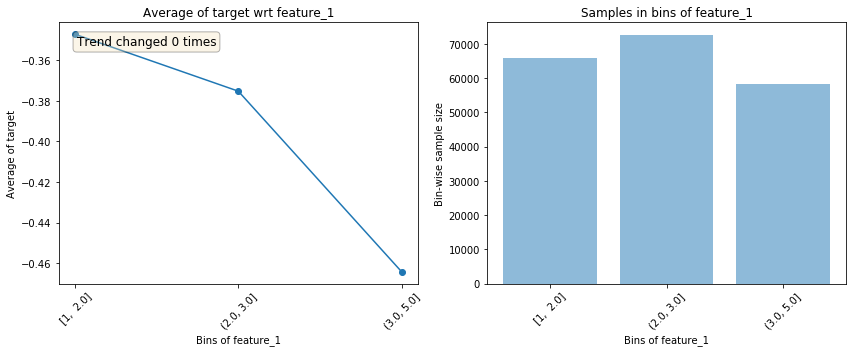

--------------------------------------------------------------------------------------------------------------


                                         Plots for feature_2                                          


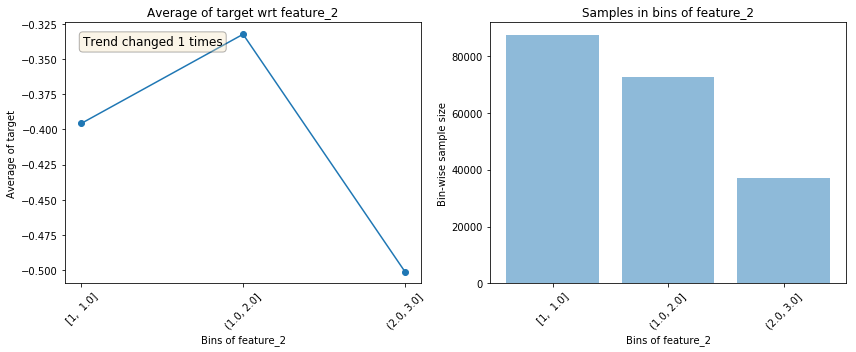

--------------------------------------------------------------------------------------------------------------


                                         Plots for feature_3                                          


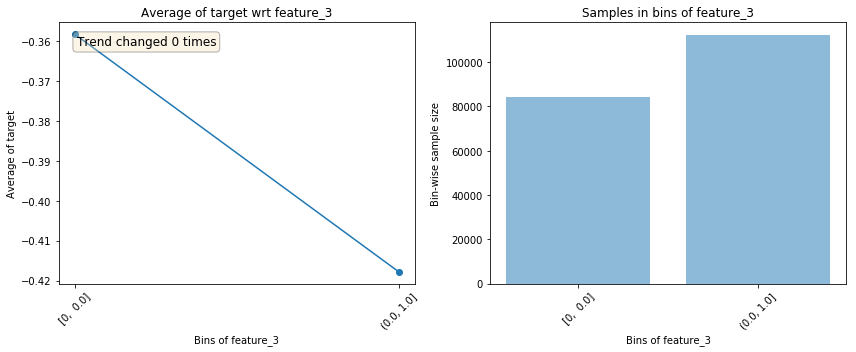

--------------------------------------------------------------------------------------------------------------


                                            Plots for year                                            


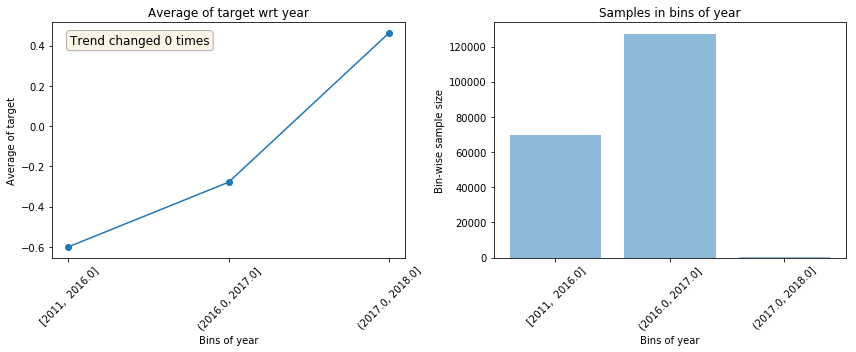

--------------------------------------------------------------------------------------------------------------


                                           Plots for month                                            


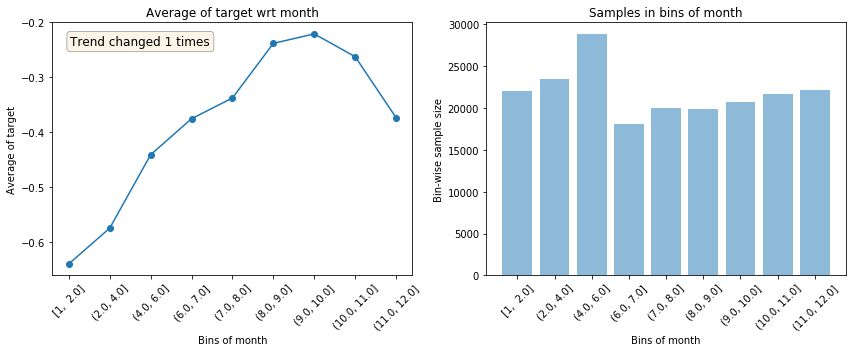

--------------------------------------------------------------------------------------------------------------


                                        Plots for elapsed_time                                        


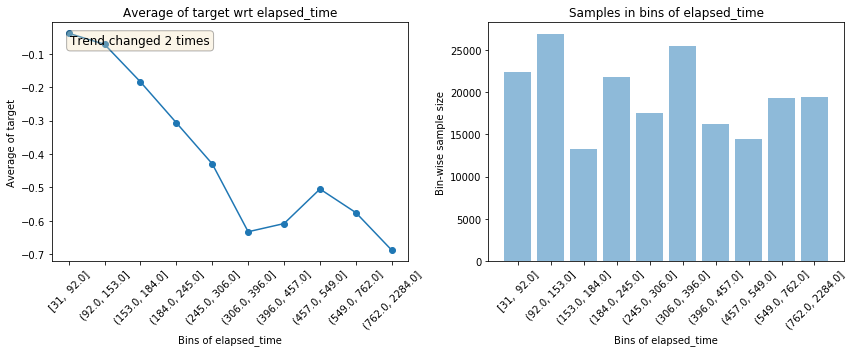

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_transactions_count_x                                  


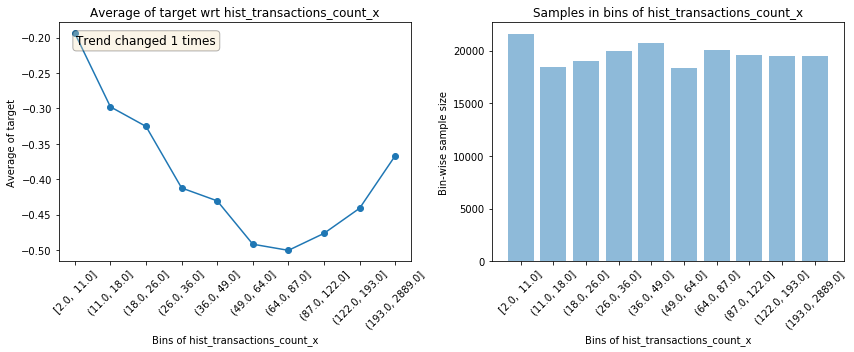

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_authorized_flag_sum_x                                 


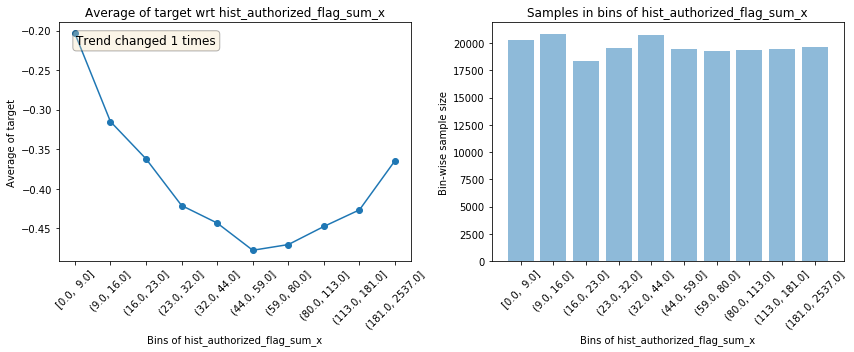

--------------------------------------------------------------------------------------------------------------


                                Plots for hist_authorized_flag_mean_x                                 


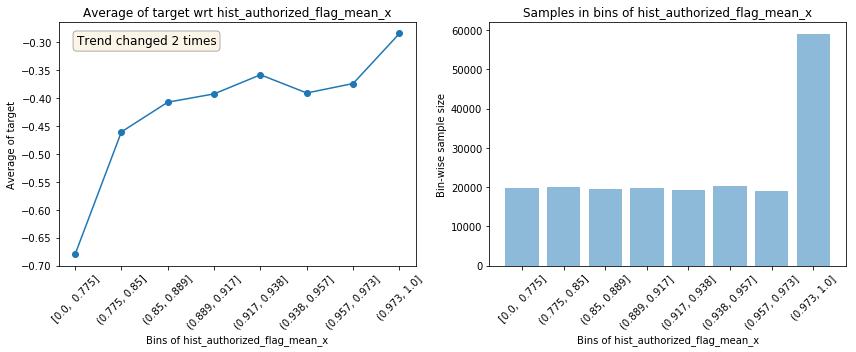

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_merchant_id_nunique_x                                 


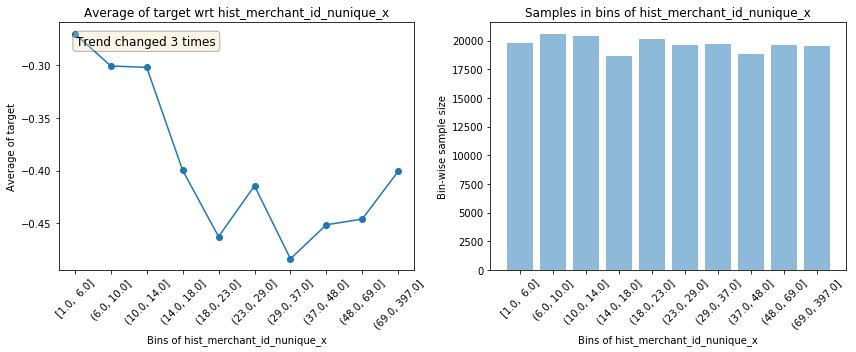

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_city_id_nunique_x                                   


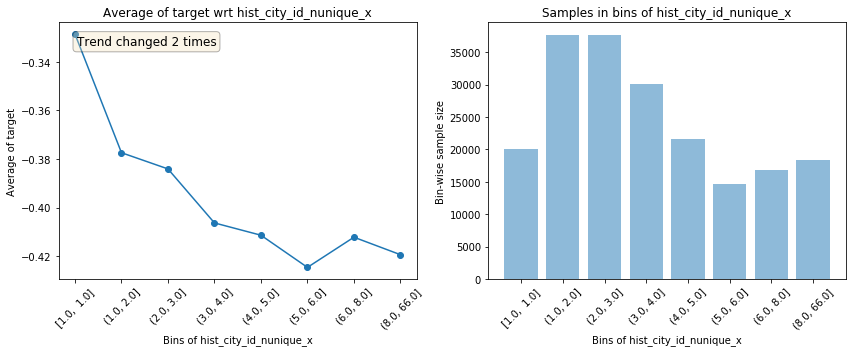

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_purchase_amount_sum_x                                 


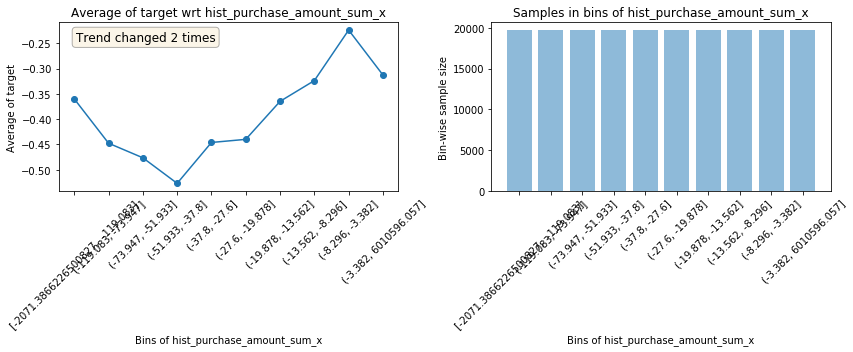

--------------------------------------------------------------------------------------------------------------


                               Plots for hist_purchase_amount_median_x                                


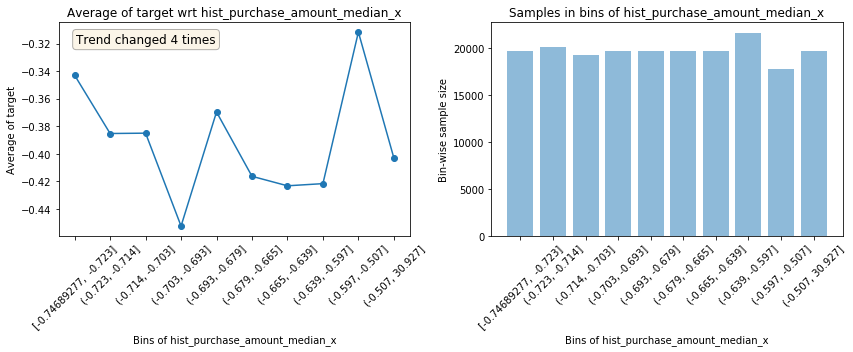

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_purchase_amount_max_x                                 


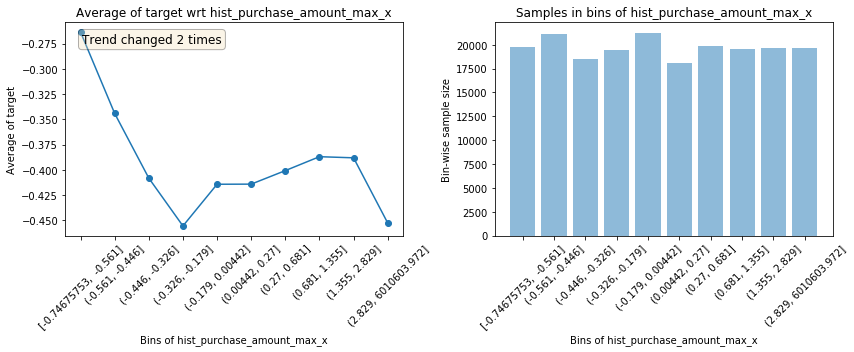

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_purchase_amount_min_x                                 


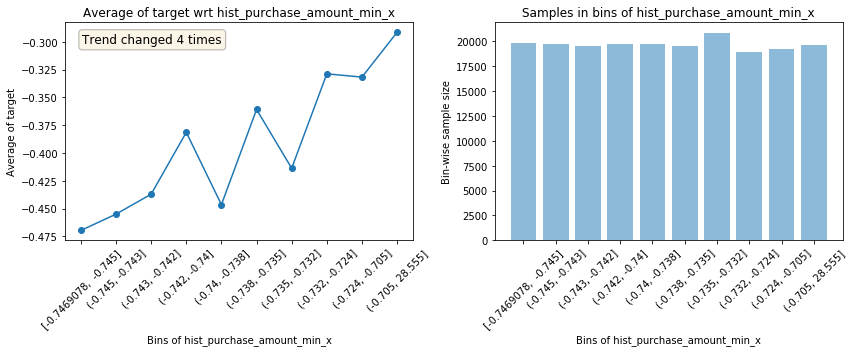

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_purchase_amount_std_x                                 


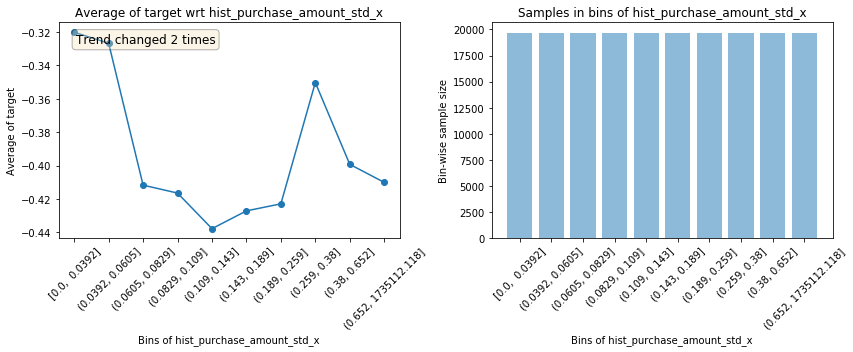

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_installments_sum_x                                   


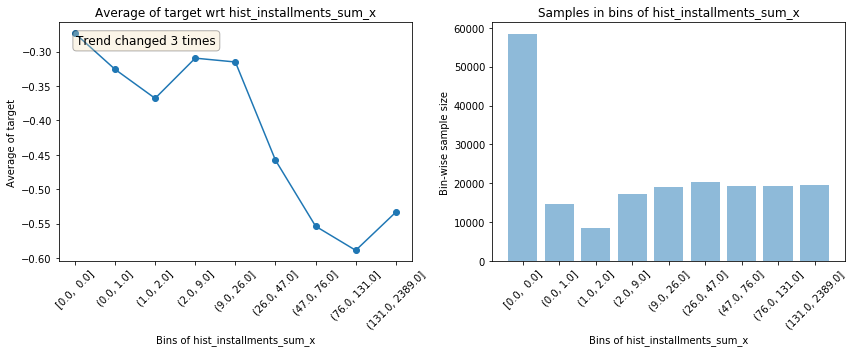

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_installments_median_x                                 


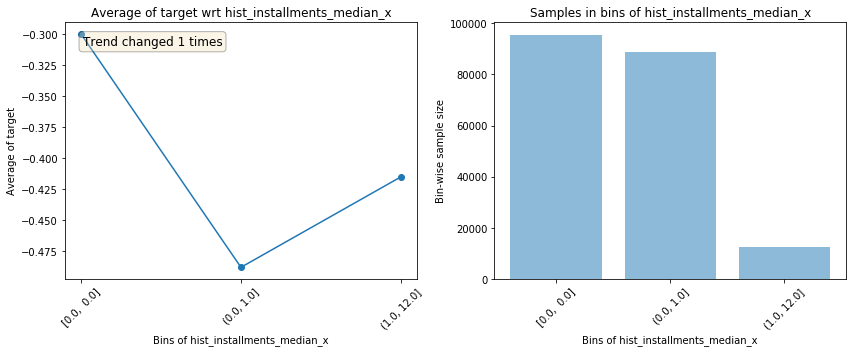

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_installments_max_x                                   


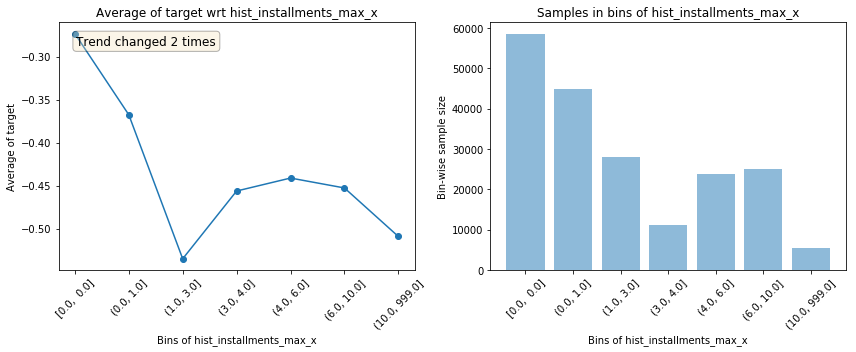

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_installments_min_x                                   


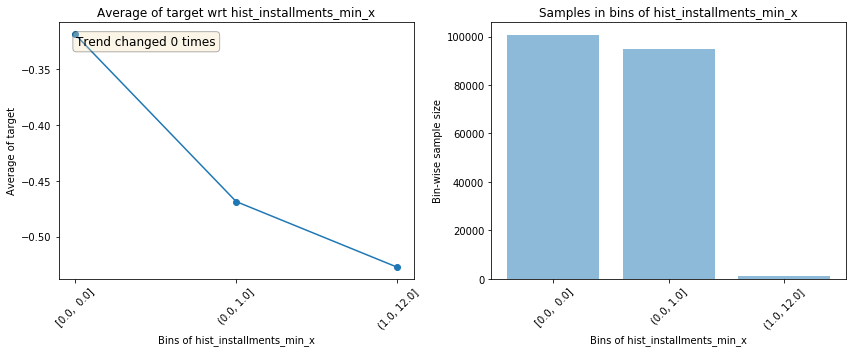

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_installments_std_x                                   


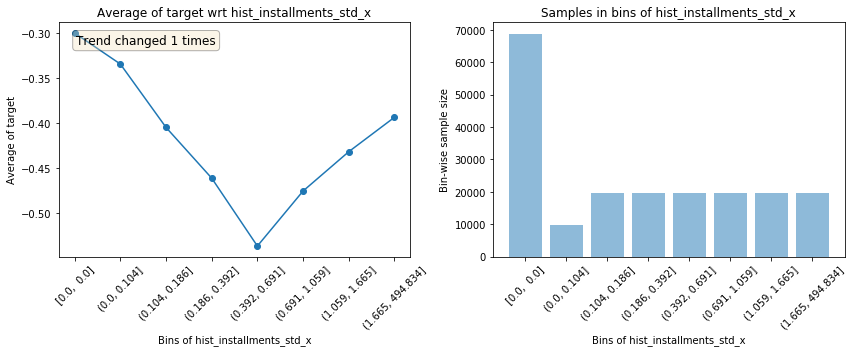

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_purchase_date_ptp_x                                  


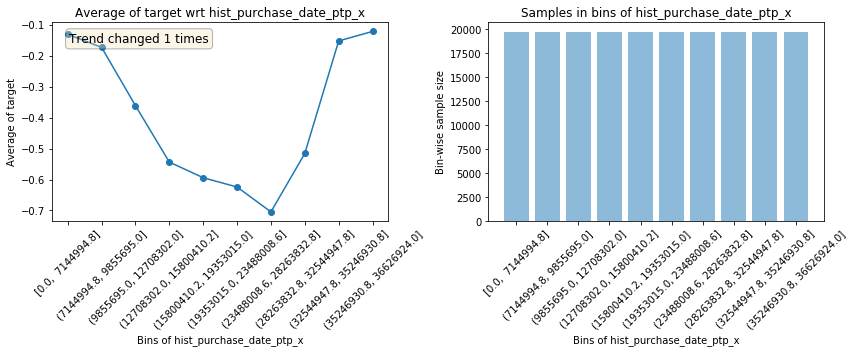

--------------------------------------------------------------------------------------------------------------


                                    Plots for hist_month_lag_min_x                                    


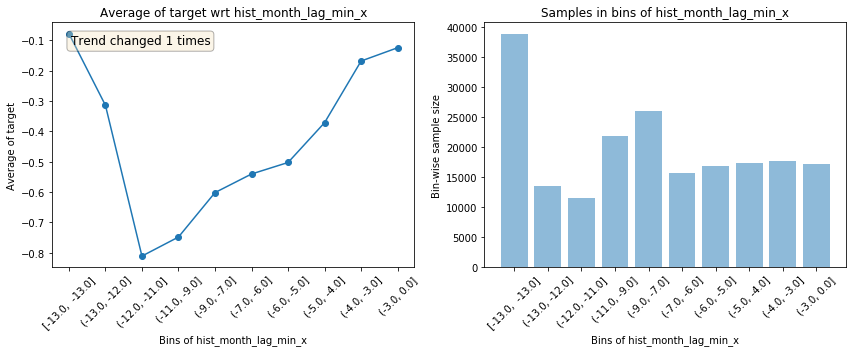

--------------------------------------------------------------------------------------------------------------


                                    Plots for hist_month_lag_max_x                                    


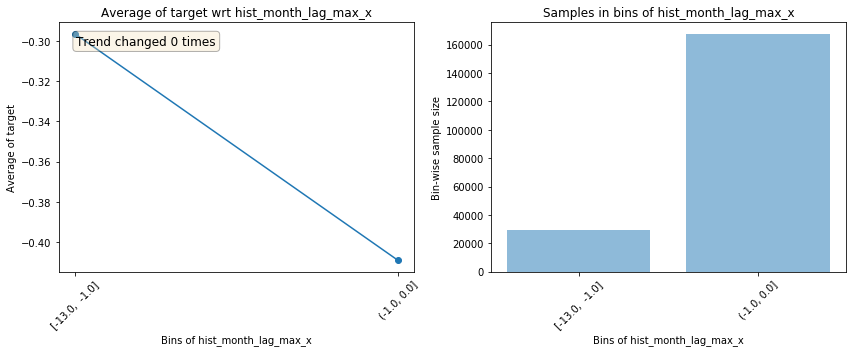

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_category_1_sum_x                                    


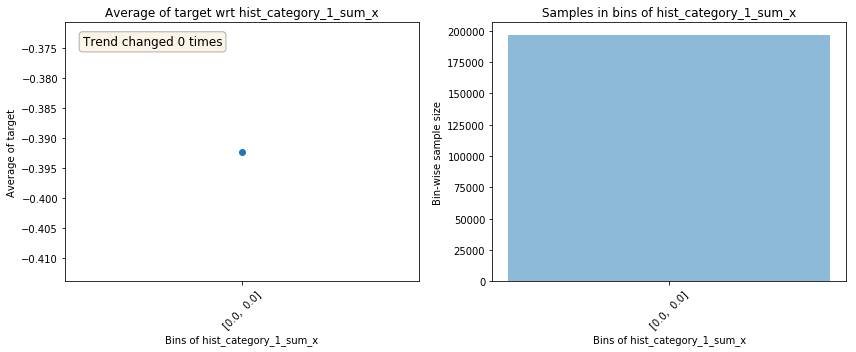

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_category_1_mean_x                                   


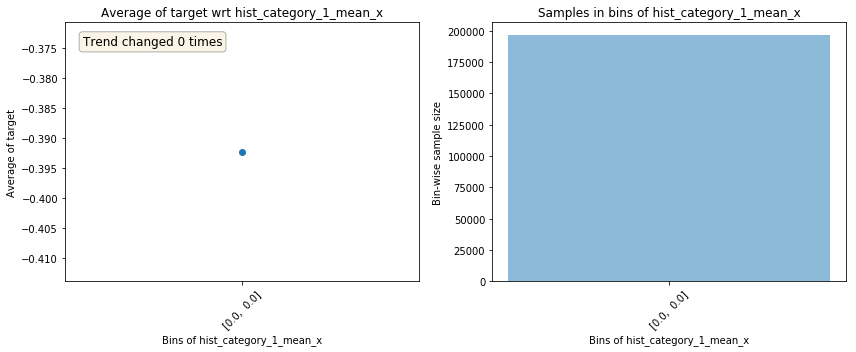

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_category_2_sum_x                                    


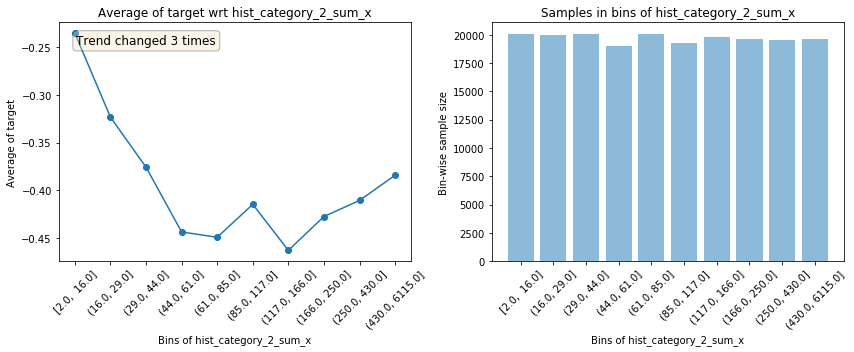

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_category_2_mean_x                                   


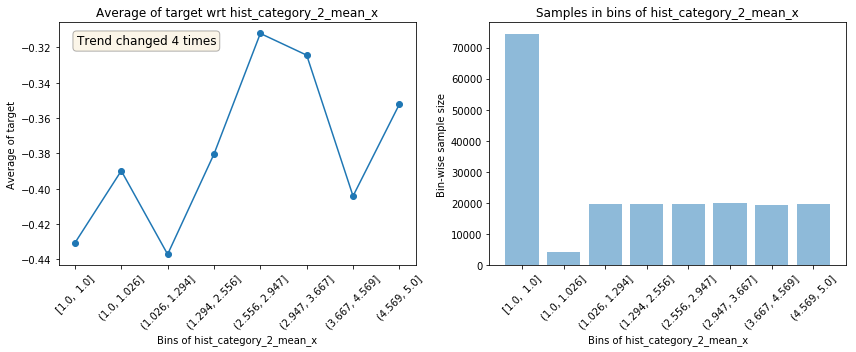

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_category_3_sum_x                                    


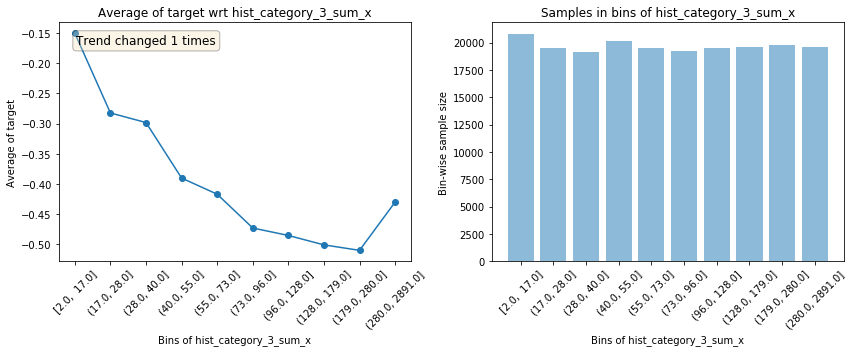

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_category_3_mean_x                                   


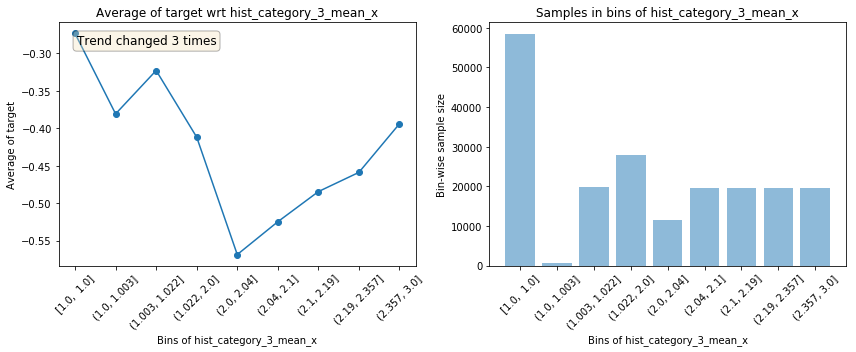

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_transactions_count_y                                  


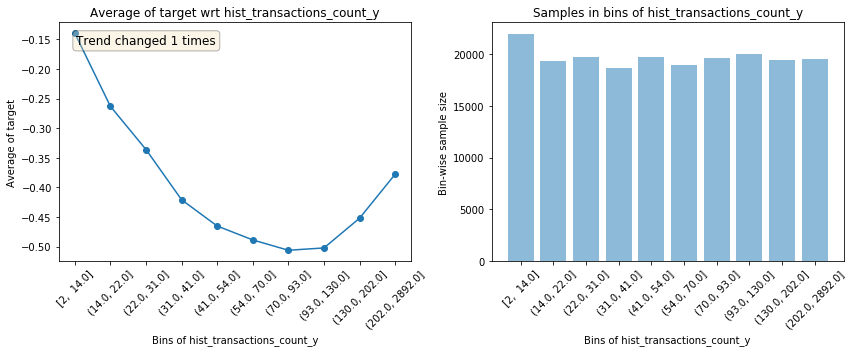

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_authorized_flag_sum_y                                 


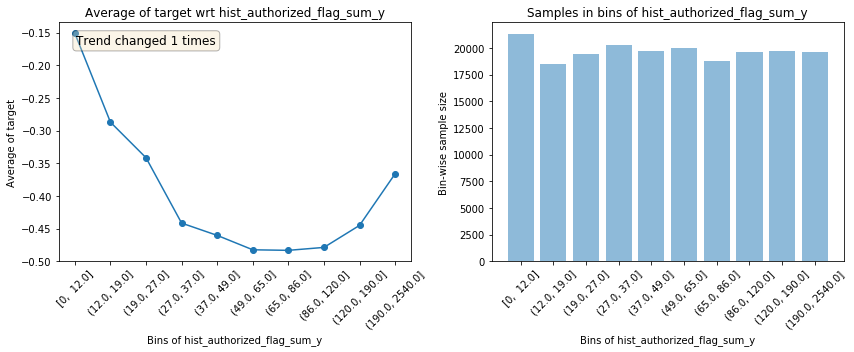

--------------------------------------------------------------------------------------------------------------


                                Plots for hist_authorized_flag_mean_y                                 


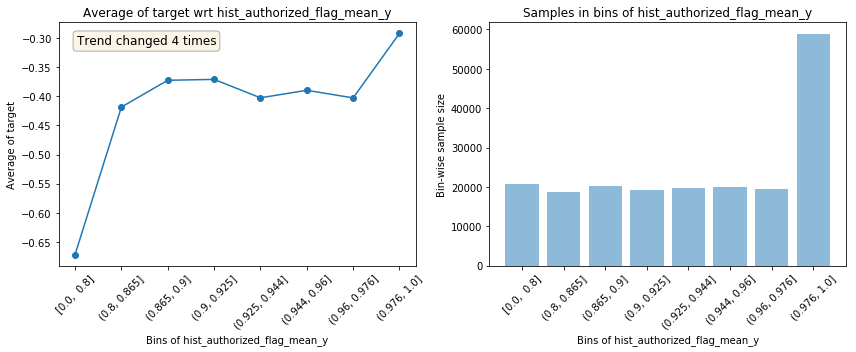

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_merchant_id_nunique_y                                 


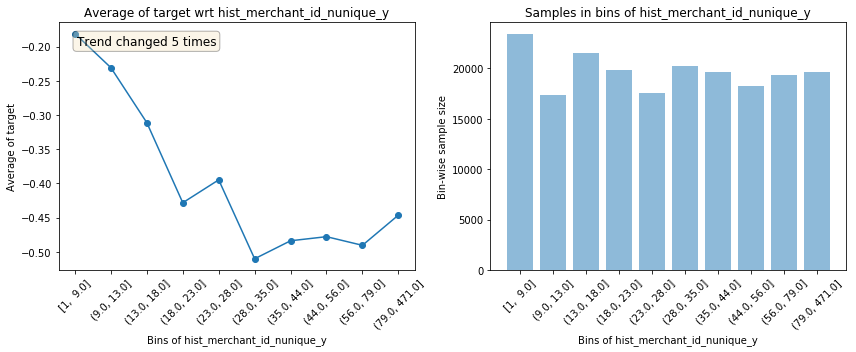

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_city_id_nunique_y                                   


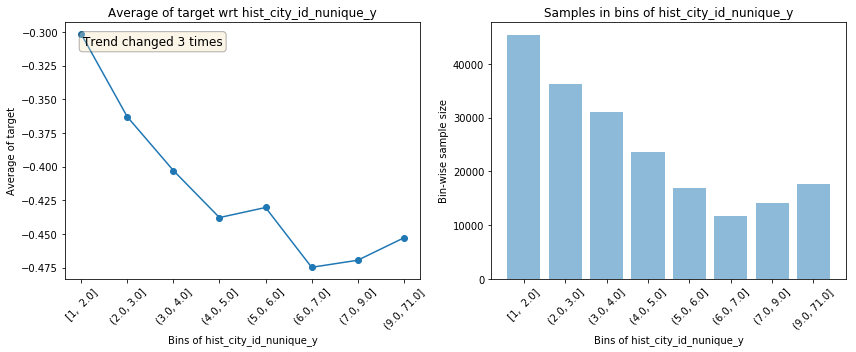

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_purchase_amount_sum_y                                 


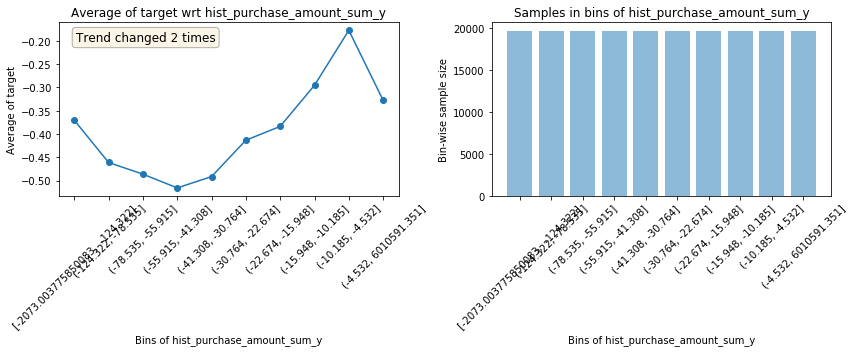

--------------------------------------------------------------------------------------------------------------


                               Plots for hist_purchase_amount_median_y                                


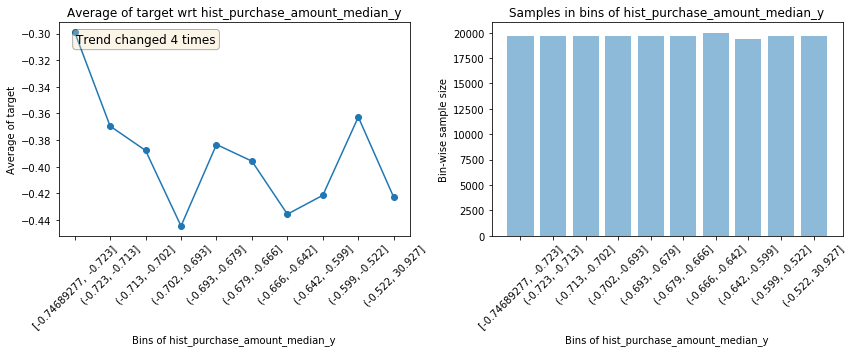

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_purchase_amount_max_y                                 


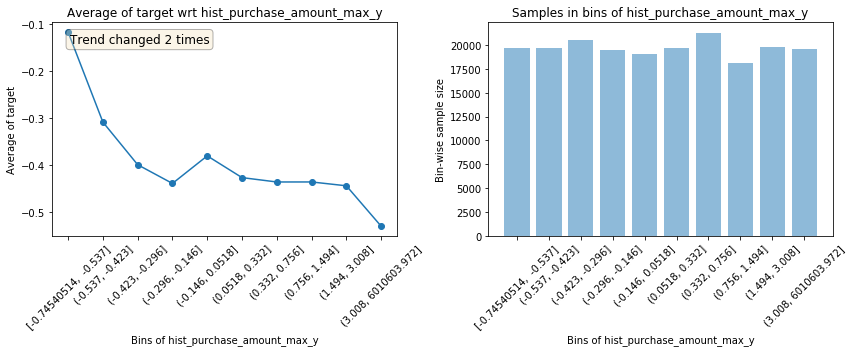

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_purchase_amount_min_y                                 


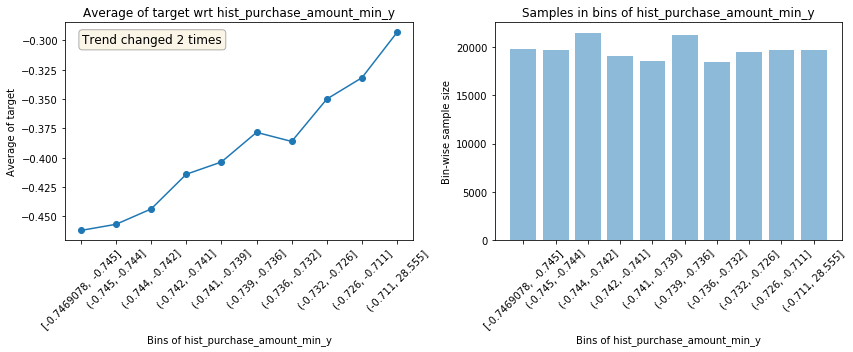

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_purchase_amount_std_y                                 


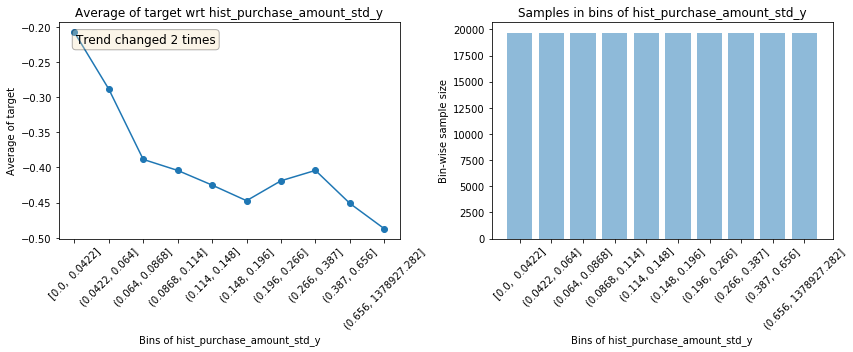

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_installments_sum_y                                   


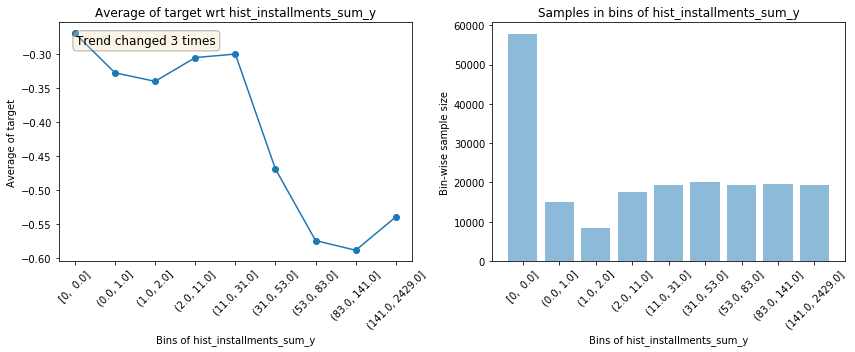

--------------------------------------------------------------------------------------------------------------


                                 Plots for hist_installments_median_y                                 


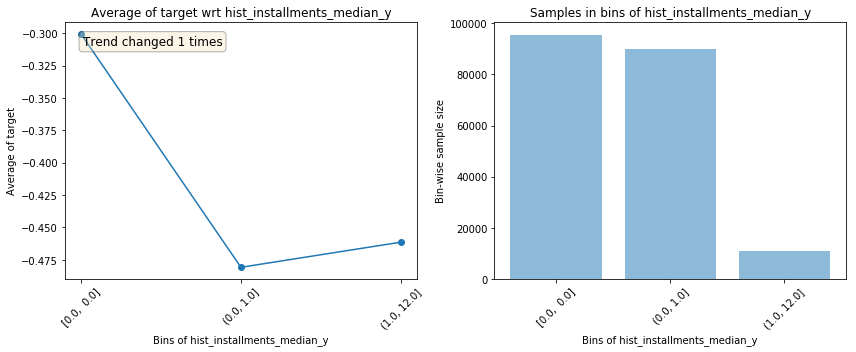

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_installments_max_y                                   


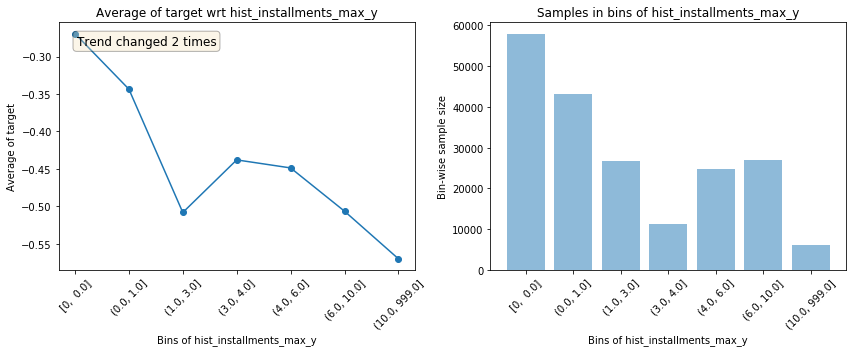

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_installments_min_y                                   


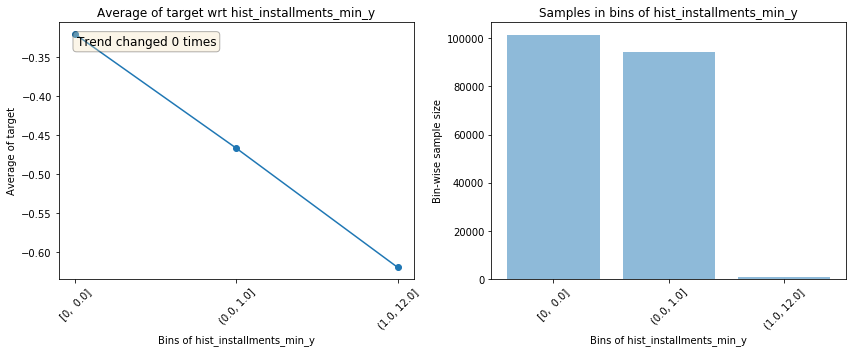

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_installments_std_y                                   


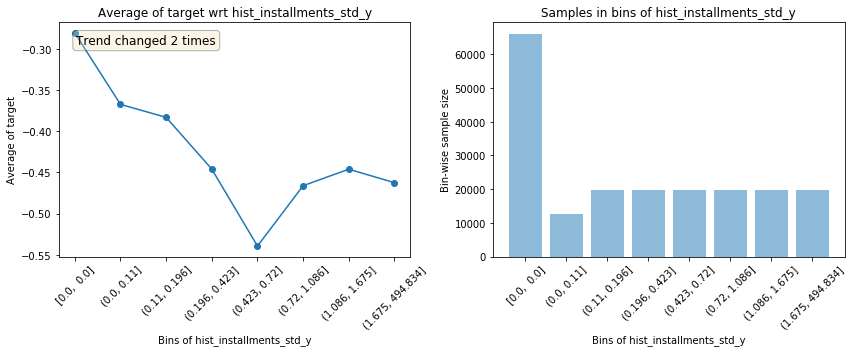

--------------------------------------------------------------------------------------------------------------


                                  Plots for hist_purchase_date_ptp_y                                  


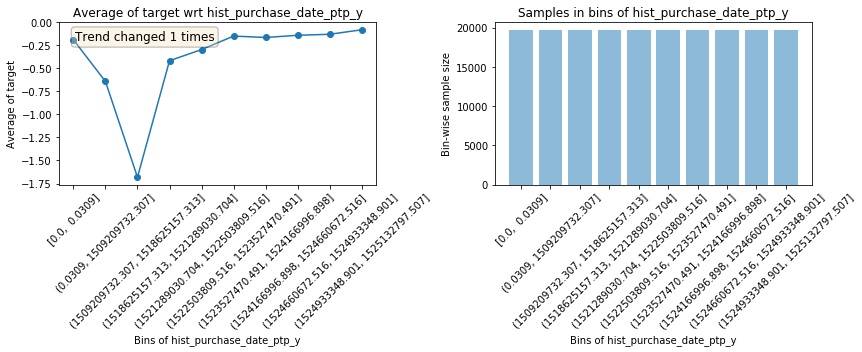

--------------------------------------------------------------------------------------------------------------


                                    Plots for hist_month_lag_min_y                                    


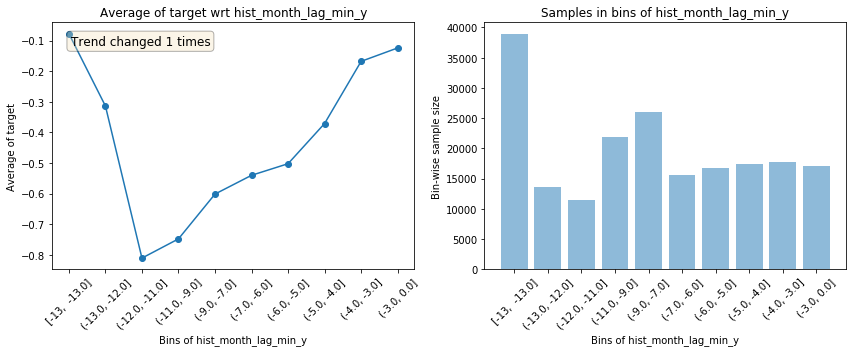

--------------------------------------------------------------------------------------------------------------


                                    Plots for hist_month_lag_max_y                                    


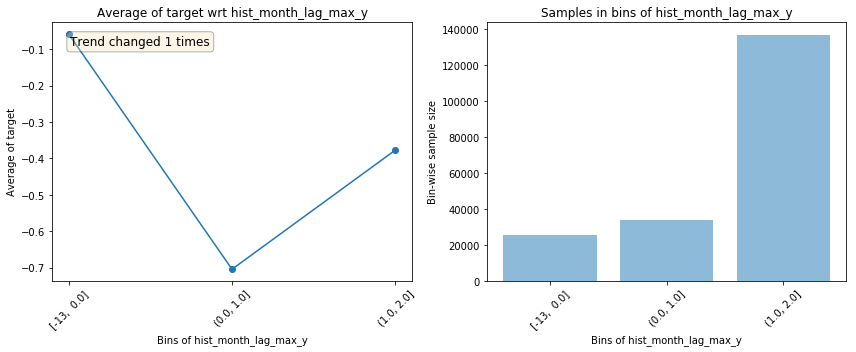

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_category_1_sum_y                                    


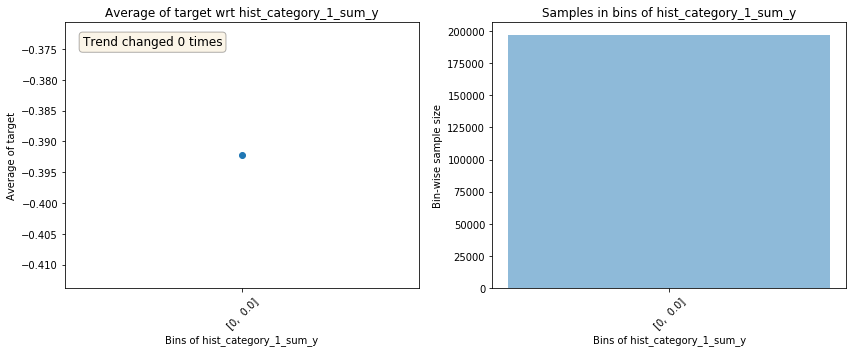

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_category_1_mean_y                                   


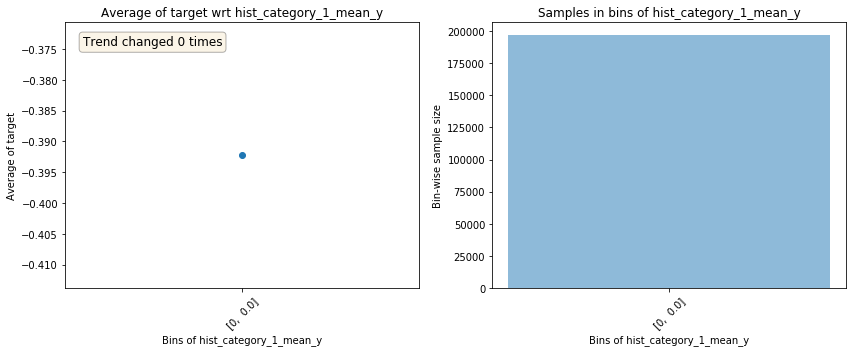

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_category_2_sum_y                                    


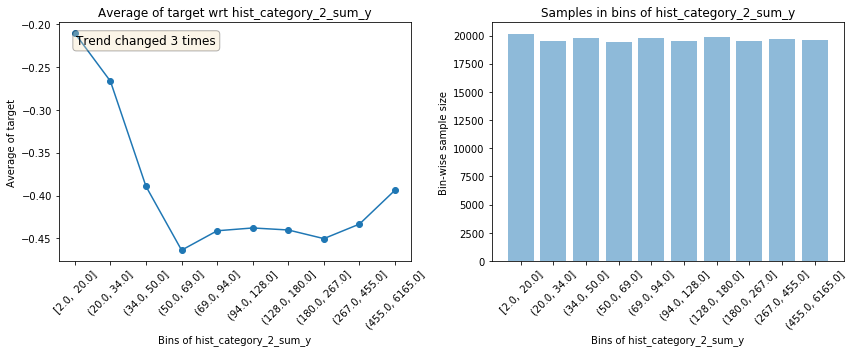

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_category_2_mean_y                                   


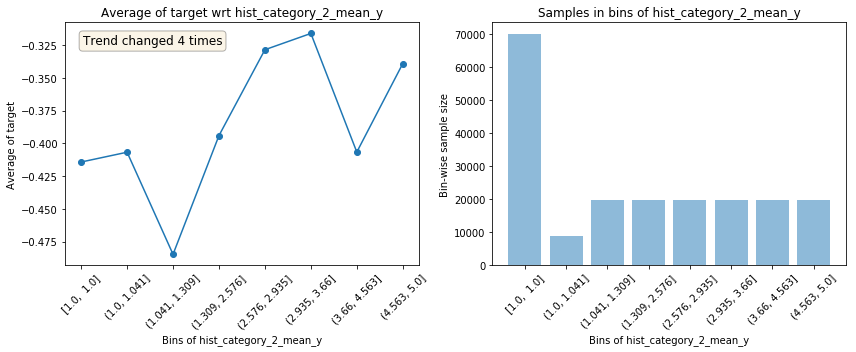

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_category_3_sum_y                                    


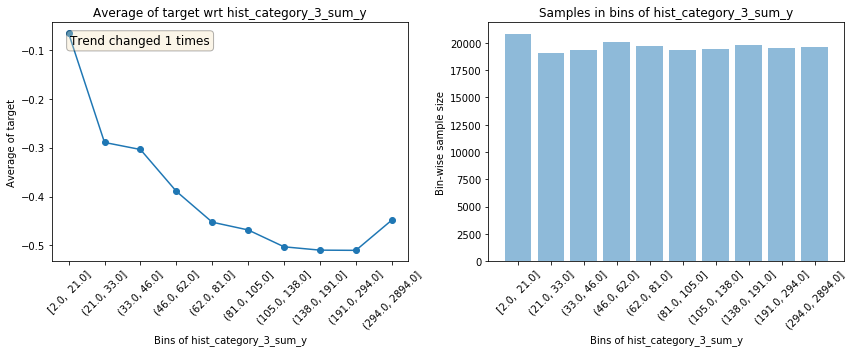

--------------------------------------------------------------------------------------------------------------


                                   Plots for hist_category_3_mean_y                                   


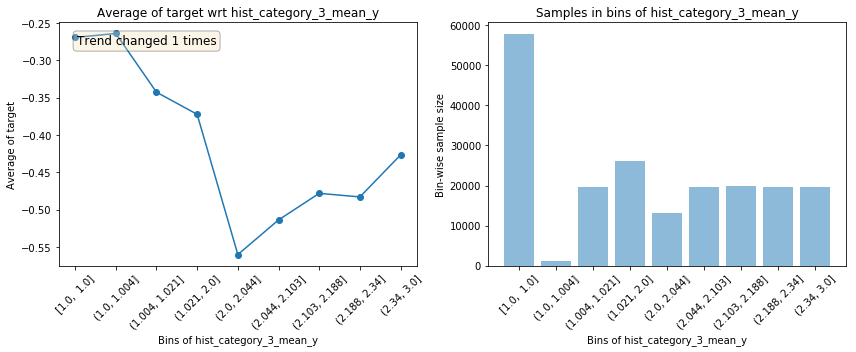

--------------------------------------------------------------------------------------------------------------




In [30]:
get_univariate_plots(data=new_train, target_col='target', features_list=[
                         
       'feature_1', 'feature_2', 'feature_3', 'year', 'month', 'elapsed_time', 'hist_transactions_count_x',
       'hist_authorized_flag_sum_x', 'hist_authorized_flag_mean_x',
       'hist_merchant_id_nunique_x', 'hist_city_id_nunique_x',
       'hist_purchase_amount_sum_x', 'hist_purchase_amount_median_x',
       'hist_purchase_amount_max_x', 'hist_purchase_amount_min_x',
       'hist_purchase_amount_std_x', 'hist_installments_sum_x',
       'hist_installments_median_x', 'hist_installments_max_x',
       'hist_installments_min_x', 'hist_installments_std_x',
       'hist_purchase_date_ptp_x', 'hist_month_lag_min_x',
       'hist_month_lag_max_x', 'hist_category_1_sum_x',
       'hist_category_1_mean_x', 'hist_category_2_sum_x',
       'hist_category_2_mean_x', 'hist_category_3_sum_x',
       'hist_category_3_mean_x', 'hist_transactions_count_y',
       'hist_authorized_flag_sum_y', 'hist_authorized_flag_mean_y',
       'hist_merchant_id_nunique_y', 'hist_city_id_nunique_y',
       'hist_purchase_amount_sum_y', 'hist_purchase_amount_median_y',
       'hist_purchase_amount_max_y', 'hist_purchase_amount_min_y',
       'hist_purchase_amount_std_y', 'hist_installments_sum_y',
       'hist_installments_median_y', 'hist_installments_max_y',
       'hist_installments_min_y', 'hist_installments_std_y',
       'hist_purchase_date_ptp_y', 'hist_month_lag_min_y',
       'hist_month_lag_max_y', 'hist_category_1_sum_y',
       'hist_category_1_mean_y', 'hist_category_2_sum_y',
       'hist_category_2_mean_y', 'hist_category_3_sum_y',
       'hist_category_3_mean_y'
                         
                     ], bins=10)